<a href="https://colab.research.google.com/github/poonachaka/skill/blob/main/Boundary_Detection11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Boundary Detection**

In [ ]:
!pip install opencv-python numpy matplotlib scikit-image

Saving MRI.jpg to MRI (1).jpg


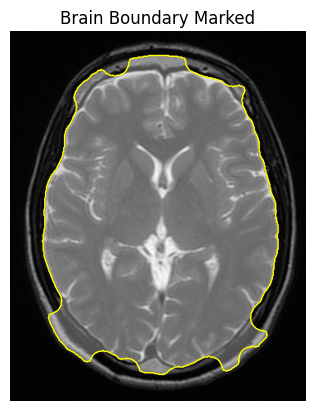

In [ ]:
from google.colab import files
files.upload()
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.morphology import disk, opening, closing
from skimage.filters import threshold_otsu
image_path = '/content/MRI.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
thresh = threshold_otsu(img)
binary_img = img > thresh
binary_img = opening(binary_img, disk(5)) # Remove small objects
binary_img = closing(binary_img, disk(15)) # Close small holes

contours = measure.find_contours(binary_img, 0.8)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for contour in contours:
  ax.plot(contour[:, 1], contour[:, 0], color='yellow', linewidth=1)
for contour in contours:
  ax.fill(contour[:, 1], contour[:, 0], 'w', alpha=0.3)

ax.set_title('Brain Boundary Marked')
plt.axis('off')
plt.show()
